## 1.5 嵌套分类因素的模型（Models for Nested Classification Factors）
- 对 27 名儿童（其中 16 名男孩，11 名女孩）从 8 岁起每隔两年测量一次其脑垂体到翼上颌裂的距离，一直测到 14 岁。欲研究男女差异。
- 响应变量：脑垂体到翼上颌裂的距离
- 分类变量：性别
- 连续协变量： 年龄
#### 如何处理嵌套结构呢？

#### 案例：
- 实验人员给 10 只狗每只都注射了一种造影染料，记录了来自腋窝区域左右淋巴结的 CT 平均像素强度， 总共追踪 21天。
- 响应变量： 平均像素强度
- 分类变量： 左、右侧
- 连续变量： 注射后天数
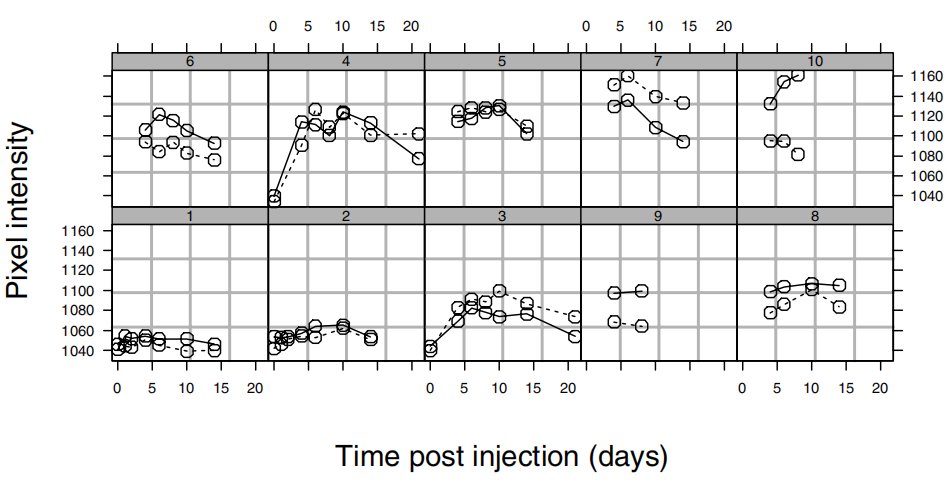

In [1]:
library(nlme)

#### 固定效应：
- 截距项 
- 左右侧（Side）
- 天（day）
#### 随机效应：
- 狗（狗与狗不同）
- 狗天（狗的天与天不同）
- 狗左右侧（狗的左侧与右侧不同）

In [7]:
fm1Pixel <- lme( pixel ~ day + I(day^2), data = Pixel,  random = list( Dog = ~ day, Side = ~ 1 ) )
intervals( fm1Pixel )

Approximate 95% confidence intervals

 Fixed effects:
                   lower         est.        upper
(Intercept) 1053.0968388 1073.3391382 1093.5814376
day            4.3796925    6.1295971    7.8795016
I(day^2)      -0.4349038   -0.3673503   -0.2997967

 Random Effects:
  Level: Dog 
                          lower       est.      upper
sd((Intercept))      15.9276005 28.3699038 50.5318703
sd(day)               1.0813866  1.8437505  3.1435711
cor((Intercept),day) -0.8946466 -0.5547222  0.1919678
  Level: Side 
                   lower     est.    upper
sd((Intercept)) 10.41692 16.82431 27.17285

 Within-group standard error:
    lower      est.     upper 
 7.634521  8.989606 10.585210 

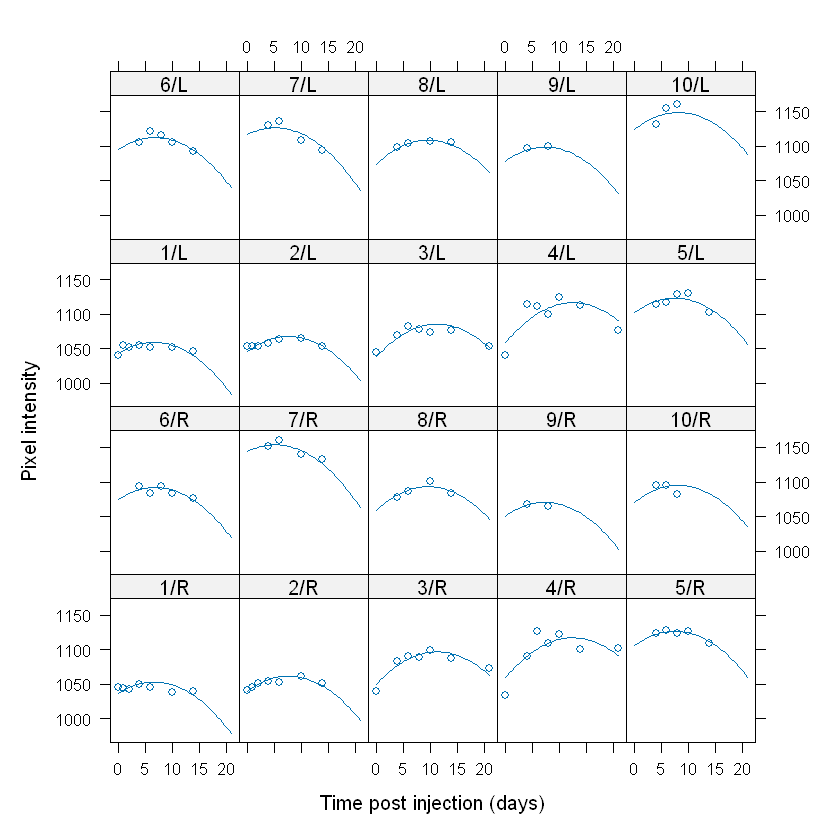

In [8]:
plot( augPred( fm1Pixel ) ) 

#### 模型结构：

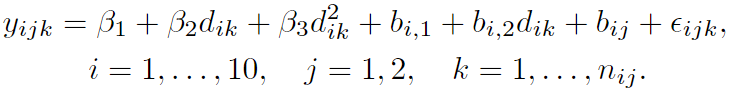
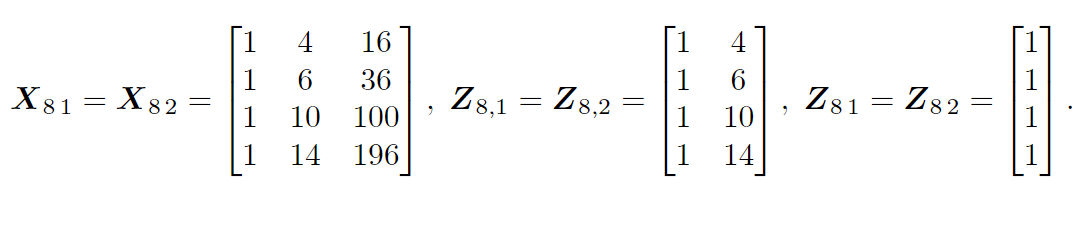

- 以 8 号狗为例，4、6、10、14天都有扫描
- Xij 代表固定效应, Zij 代表 i 狗 j 侧的随机效应,  Zi,j 代表 i 狗 j 侧内天数的随机效应
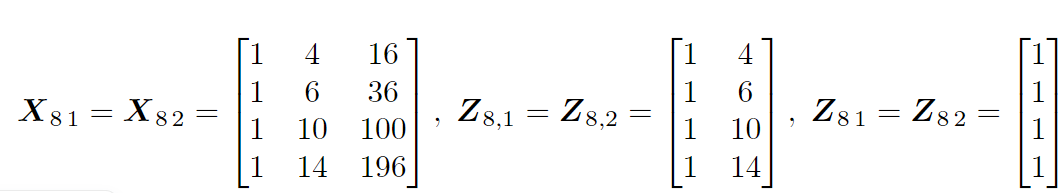

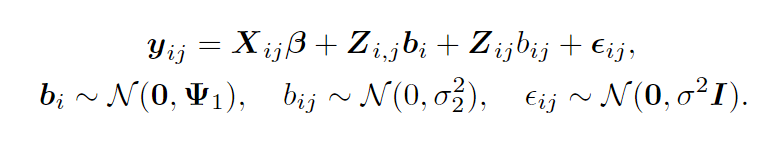

In [9]:
VarCorr( fm1Pixel )

            Variance       StdDev    Corr  
Dog =       pdLogChol(day)                 
(Intercept) 804.851443     28.369904 (Intr)
day           3.399416      1.843750 -0.555
Side =      pdLogChol(1)                   
(Intercept) 283.057248     16.824305       
Residual     80.813009      8.989606       

In [10]:
summary( fm1Pixel )

Linear mixed-effects model fit by REML
  Data: Pixel 
       AIC      BIC    logLik
  841.2102 861.9712 -412.6051

Random effects:
 Formula: ~day | Dog
 Structure: General positive-definite, Log-Cholesky parametrization
            StdDev   Corr  
(Intercept) 28.36990 (Intr)
day          1.84375 -0.555

 Formula: ~1 | Side %in% Dog
        (Intercept) Residual
StdDev:    16.82431 8.989606

Fixed effects:  pixel ~ day + I(day^2) 
                Value Std.Error DF   t-value p-value
(Intercept) 1073.3391 10.171686 80 105.52225       0
day            6.1296  0.879321 80   6.97083       0
I(day^2)      -0.3674  0.033945 80 -10.82179       0
 Correlation: 
         (Intr) day   
day      -0.517       
I(day^2)  0.186 -0.668

Standardized Within-Group Residuals:
       Min         Q1        Med         Q3        Max 
-2.8290572 -0.4491811  0.0255493  0.5572163  2.7519651 

Number of Observations: 102
Number of Groups: 
          Dog Side %in% Dog 
           10            20 

#### 如果没有 side 的随机效应

In [11]:
fm2Pixel <- update( fm1Pixel, random = ~ day | Dog)

In [12]:
summary(fm2Pixel)

Linear mixed-effects model fit by REML
  Data: Pixel 
       AIC      BIC    logLik
  884.5196 902.6854 -435.2598

Random effects:
 Formula: ~day | Dog
 Structure: General positive-definite, Log-Cholesky parametrization
            StdDev    Corr  
(Intercept) 29.883240 (Intr)
day          1.754207 -0.489
Residual    14.056243       

Fixed effects:  pixel ~ day + I(day^2) 
                Value Std.Error DF   t-value p-value
(Intercept) 1072.9283 10.445666 90 102.71516       0
day            6.0889  1.146997 90   5.30856       0
I(day^2)      -0.3568  0.052210 90  -6.83314       0
 Correlation: 
         (Intr) day   
day      -0.541       
I(day^2)  0.286 -0.799

Standardized Within-Group Residuals:
        Min          Q1         Med          Q3         Max 
-2.85494002 -0.53431941 -0.01425967  0.56188163  2.81513852 

Number of Observations: 102
Number of Groups: 10 

In [13]:
anova( fm1Pixel, fm2Pixel )

,call,Model,df,AIC,BIC,logLik,Test,L.Ratio,p-value
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>
fm1Pixel,"lme.formula(fixed = pixel ~ day + I(day^2), data = Pixel, random = list(Dog = ~day, Side = ~1))",1,8,841.2102,861.9712,-412.6051,,NA,NA
fm2Pixel,"lme.formula(fixed = pixel ~ day + I(day^2), data = Pixel, random = ~day | Dog)",2,7,884.5196,902.6854,-435.2598,1 vs 2,45.3094,1.682398e-11


- 检查在 “狗” 这一层级上关于天数的随机效应是否必要。如果我们去掉这一项，那么唯一的随机效应将是每只狗以及每只狗的每侧的随机效应。

In [15]:
fm3Pixel <- update( fm1Pixel, random = ~ 1 | Dog/Side )
summary(fm3Pixel)

Linear mixed-effects model fit by REML
  Data: Pixel 
      AIC      BIC    logLik
  876.839 892.4098 -432.4195

Random effects:
 Formula: ~1 | Dog
        (Intercept)
StdDev:    22.82188

 Formula: ~1 | Side %in% Dog
        (Intercept) Residual
StdDev:    15.70076 12.91654

Fixed effects:  pixel ~ day + I(day^2) 
                Value Std.Error DF   t-value p-value
(Intercept) 1074.4960  8.775773 80 122.43890       0
day            4.8722  0.825372 80   5.90299       0
I(day^2)      -0.2474  0.042215 80  -5.86016       0
 Correlation: 
         (Intr) day   
day      -0.353       
I(day^2)  0.294 -0.945

Standardized Within-Group Residuals:
        Min          Q1         Med          Q3         Max 
-3.86384478 -0.48099624  0.06525345  0.53328726  1.93362455 

Number of Observations: 102
Number of Groups: 
          Dog Side %in% Dog 
           10            20 

In [16]:
anova( fm1Pixel, fm3Pixel )

,call,Model,df,AIC,BIC,logLik,Test,L.Ratio,p-value
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>
fm1Pixel,"lme.formula(fixed = pixel ~ day + I(day^2), data = Pixel, random = list(Dog = ~day, Side = ~1))",1,8,841.2102,861.9712,-412.6051,,NA,NA
fm3Pixel,"lme.formula(fixed = pixel ~ day + I(day^2), data = Pixel, random = ~1 | Dog/Side)",2,6,876.8390,892.4098,-432.4195,1 vs 2,39.62885,2.48145e-09


#### 先前没考虑 side 的固定效应

In [17]:
fm4Pixel <- update( fm1Pixel, pixel ~ day + day^2 + Side )
summary( fm4Pixel )

Linear mixed-effects model fit by REML
  Data: Pixel 
      AIC      BIC    logLik
  895.071 915.8319 -439.5355

Random effects:
 Formula: ~day | Dog
 Structure: General positive-definite, Log-Cholesky parametrization
            StdDev   Corr  
(Intercept) 31.52017 (Intr)
day          1.07333 -0.786

 Formula: ~1 | Side %in% Dog
        (Intercept) Residual
StdDev:    15.01697 14.50742

Fixed effects:  pixel ~ day + Side 
                Value Std.Error DF  t-value p-value
(Intercept) 1097.5272 11.562598 81 94.92046  0.0000
day           -0.1496  0.491215 81 -0.30451  0.7615
SideR         -8.6098  7.379980  9 -1.16664  0.2733
 Correlation: 
      (Intr) day   
day   -0.633       
SideR -0.319  0.000

Standardized Within-Group Residuals:
        Min          Q1         Med          Q3         Max 
-3.73906807 -0.38367308  0.04758314  0.39690045  2.23720388 

Number of Observations: 102
Number of Groups: 
          Dog Side %in% Dog 
           10            20 

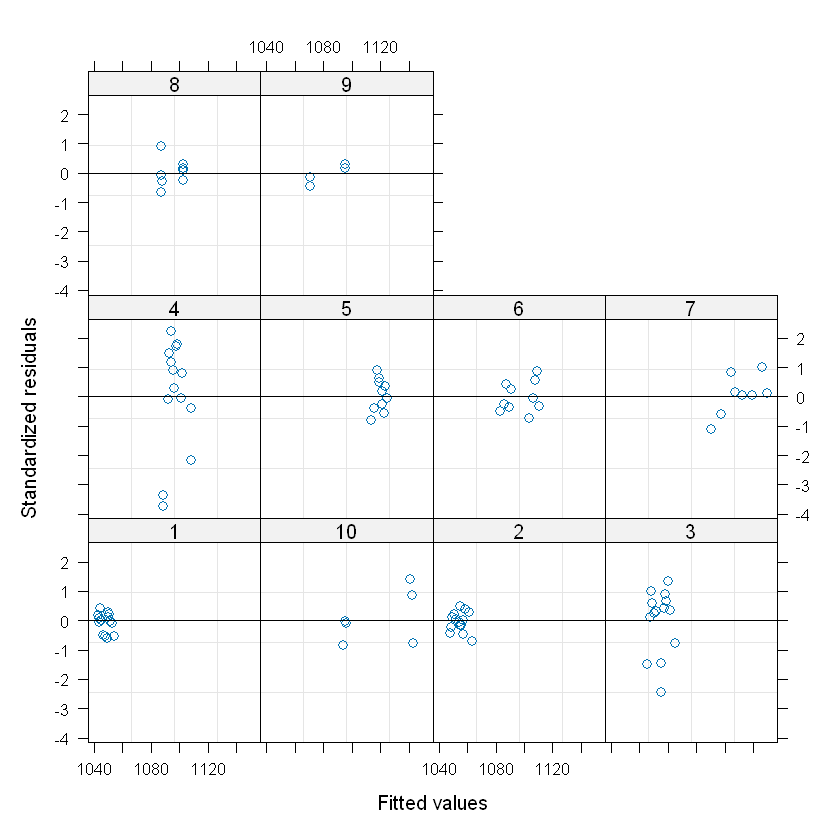

In [21]:
plot( fm4Pixel, form = resid(., type = "p") ~ fitted(.) | Dog, abline = 0 )